# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config information.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="        

In [4]:
# set up lists to hold reponse info

lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | saint-paul
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kalmunai
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | conakry
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | muncar
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | jizan
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | aklavik
Processing Record 23 of Set 1 | tho

Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | maceio
Processing Record 44 of Set 4 | aktash
Processing Record 45 of Set 4 | kodinsk
Processing Record 46 of Set 4 | arman
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | iki-burul
Processing Record 49 of Set 4 | aksay
Processing Record 50 of Set 4 | onguday
Processing Record 1 of Set 5 | alta floresta
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | nedumangad
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | hukuntsi
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5 | sakaiminato
Processing Record 9 of Set 5 | okakarara
Processing Record 10 of Set 5 | comodoro rivadavia
Processing Record 11 of Set 5 | chenzhou
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set

Processing Record 25 of Set 8 | kununurra
Processing Record 26 of Set 8 | tautira
Processing Record 27 of Set 8 | bilma
Processing Record 28 of Set 8 | tongliao
Processing Record 29 of Set 8 | tecpan
Processing Record 30 of Set 8 | salalah
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | aksu
Processing Record 33 of Set 8 | alugan
Processing Record 34 of Set 8 | hisua
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | vinh
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | mukhen
Processing Record 40 of Set 8 | inuvik
Processing Record 41 of Set 8 | weligama
Processing Record 42 of Set 8 | san pedro
Processing Record 43 of Set 8 | provideniya
Processing Record 44 of Set 8 | okhotsk
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | mareeba
Processing Record 47 of Set 8 | hegang
Processing Record 48 of Set 8 | aktau
Processing Record 49 of Set 8 | k

Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | ribeira brava
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | bud
Processing Record 22 of Set 12 | zlotow
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | jawhar
Processing Record 25 of Set 12 | buncrana
Processing Record 26 of Set 12 | guarapari
Processing Record 27 of Set 12 | pargolovo
Processing Record 28 of Set 12 | parit raja
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | borovskoy
Processing Record 31 of Set 12 | namie
Processing Record 32 of Set 12 | muisne
Processing Record 33 of Set 12 | victoria
Processing Record 34 of Set 12 | blonduos
City not found. Skipping...
Processing Record 35 of Set 12 | nordenham
Processing Record 36 of Set 12 | severomorsk
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | saraza
Processing Record 39 of Set 12 | hauterive
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data to dataframe

city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API

city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file

city_weather_df.to_csv("./cities.csv", index=False)

# Display the DataFrame

weather_df = pd.read_csv("./cities.csv")

City          598
Cloudiness    598
Country       598
Date          598
Humidity      598
Latitude      598
Longitude     598
Max Temp      598
Wind Speed    598
dtype: int64


In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,east london,0.0,ZA,1.592701e+09,27.0,-33.02,27.91,72.05,14.25
1,cape town,40.0,ZA,1.592701e+09,87.0,-33.93,18.42,61.00,16.11
2,ushuaia,75.0,AR,1.592700e+09,87.0,-54.80,-68.30,37.40,4.70
3,saint-paul,75.0,RE,1.592701e+09,68.0,-21.01,55.27,71.60,16.11
4,castro,0.0,BR,1.592701e+09,87.0,-24.79,-50.01,57.16,4.43


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

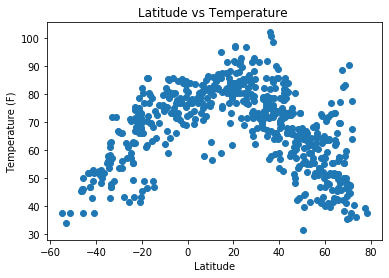

In [7]:
# Create a scatter plot for latitude vs max temperature.

x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Latitude vs Temperature ")
plt.savefig("../Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

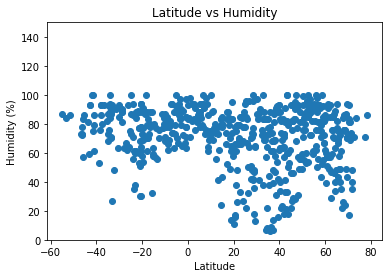

In [8]:
# Create a scatter plot for latitude vs humidity.

x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity')
plt.ylim(0, 150)
plt.savefig("../Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

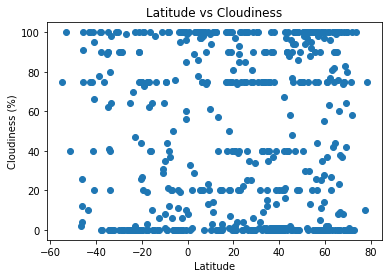

In [9]:
# Create a scatter plot for latitude vs cloudiness.

x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness')
plt.savefig("../Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

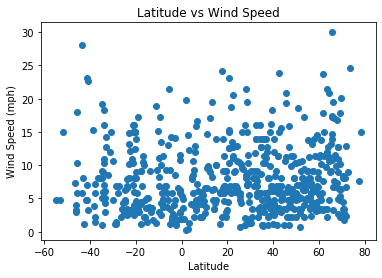

In [10]:
# Create a scatter plot for latitude vs wind speed.

x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed')
plt.savefig("../Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title("{hemisphere}Hemisphere - {x_label} vs {y_label}}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig("../Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")


#determine northern and southern hemisphere cities

northern_hemisphere = []
southern_hemisphere = []

for index, row in weather_df.iterrows():

    if row["Latitude"] > 0:
        northern_hemisphere.append(row)
    else:
        southern_hemisphere.append(row)

In [12]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_df = pd.DataFrame(northern_hemisphere)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4790448253805122
The correlation between both factors is -0.69


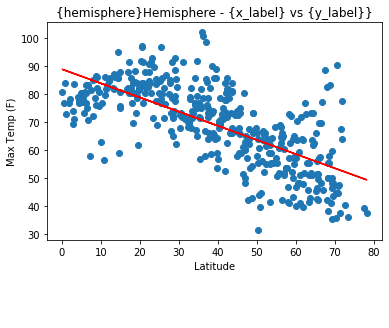

In [13]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

plt.savefig("Northern Hemisphere Temperature vs Latitude.pdf")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.614714076575478
The correlation between both factors is 0.78


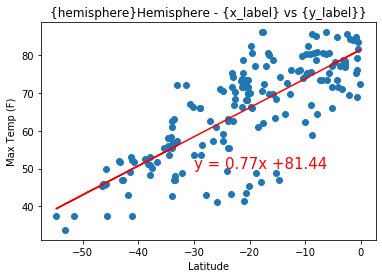

In [14]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005693746038873647
The correlation between both factors is -0.08


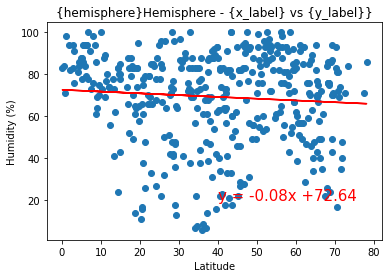

In [15]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005693746038873647
The correlation between both factors is -0.08


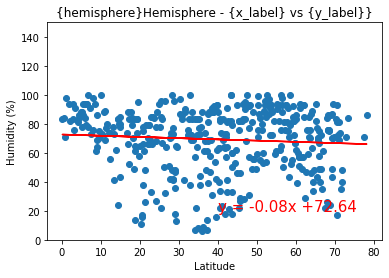

In [16]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)

x_values1 = southern_hemisphere_df['Latitude']
y_values1 = southern_hemisphere_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.465459259515637e-05
The correlation between both factors is -0.01


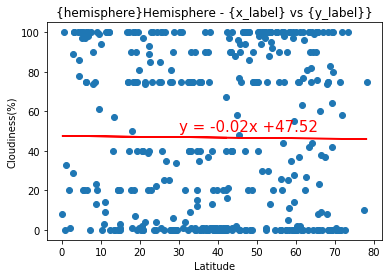

In [17]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014213282458173998
The correlation between both factors is -0.12


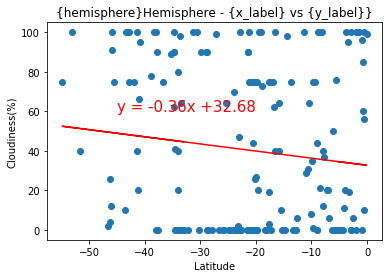

In [18]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007290390428269503
The correlation between both factors is 0.09


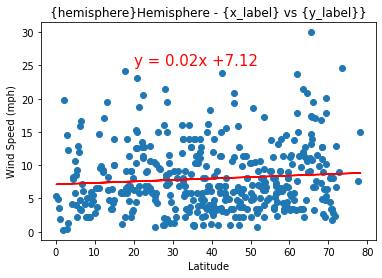

In [19]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019623550281421376
The correlation between both factors is -0.14


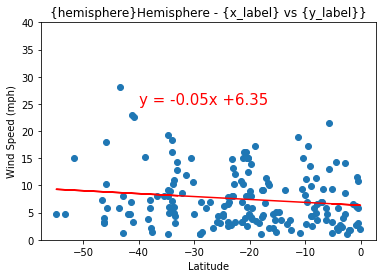

In [20]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)